# K-Means, GMM and Hierachical Clustering
In ths file I will implement 3 clustering models on a datset holding information on weight and height, this dataset does have 2 clusters but there is quite a lot of overlap.

In [1]:
# Importing Generic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wh_df = pd.read_csv(r'data\weight-height.csv')
wh_df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
# Splitting the Gender off the data
X = wh_df.iloc[:,1:]
X.head(5)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


## K-Means
This dataset holds information on individuals Height and Weight by Gender.

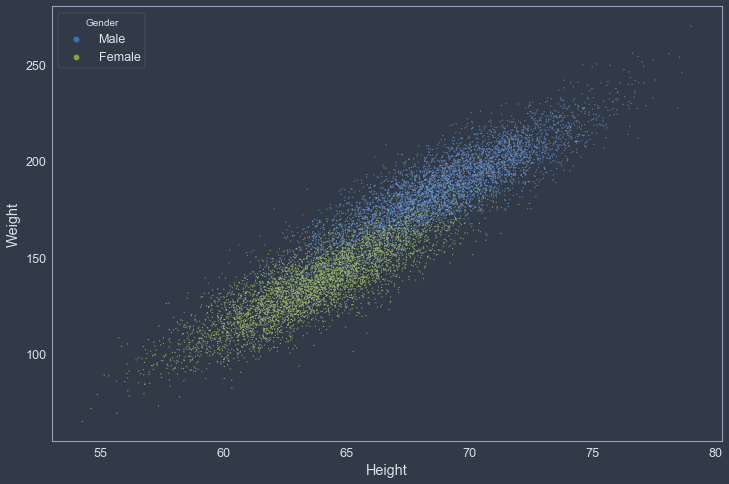

In [4]:
plt.figure(figsize=[12,8])
sns.scatterplot(data=wh_df, x="Height", y="Weight", hue="Gender", s=1)

### Within Cluster Sum of Squares (WCSS) Elbow Method
WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. This is redundant in this specific case as it is known that there are only 2 genders within the dataset, but the graph does indicate that 2 clusters is one of thye optimal number of clusters.

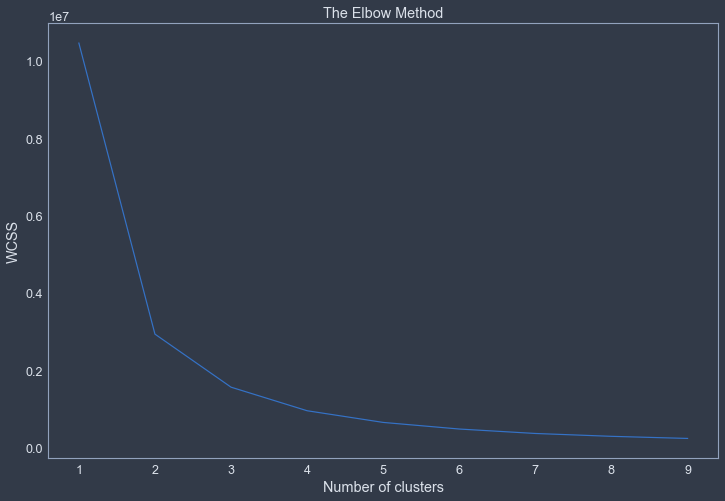

In [5]:
# Using the elbow method to find the optimal number of clusters
plt.figure(figsize=[12,8])
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

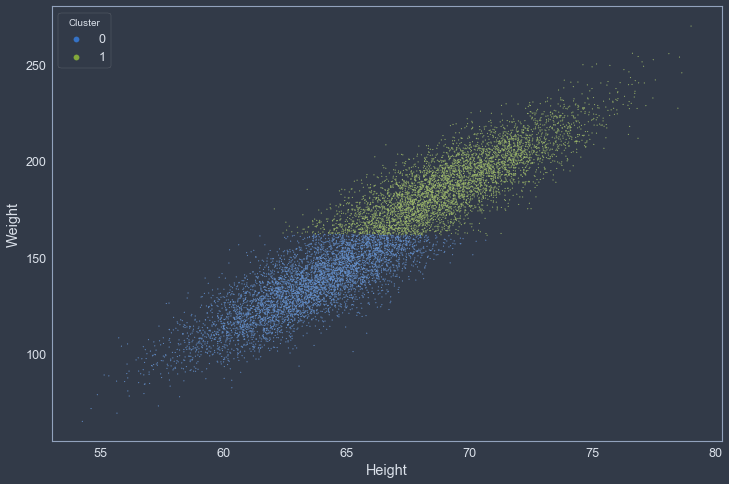

In [6]:
# Training the K-Means model on the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

# Building dataframe of predicted clusters
pred_df = pd.DataFrame(data=X, columns=['Height', 'Weight'])
pred_df['Cluster'] = y_kmeans

plt.figure(figsize=[12,8])
sns.scatterplot(data=pred_df, x="Height", y="Weight", hue="Cluster", s=1)

## EM Clustering
This is a form of soft clustering that offers a maximum likelihood that point x belongs to the surrounding clusters. A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means.

In [7]:
from sklearn import mixture
em = mixture.GaussianMixture(n_components=2, covariance_type='full')
em.fit(X)
clusters_em = em.predict_proba(X)
# Predict Probablities of the value belongs to each cluster, 2 as we defined 2 clusters
clusters_em.round(3)

array([[0.   , 1.   ],
       [0.662, 0.338],
       [0.001, 0.999],
       ...,
       [0.994, 0.006],
       [0.616, 0.384],
       [0.999, 0.001]])

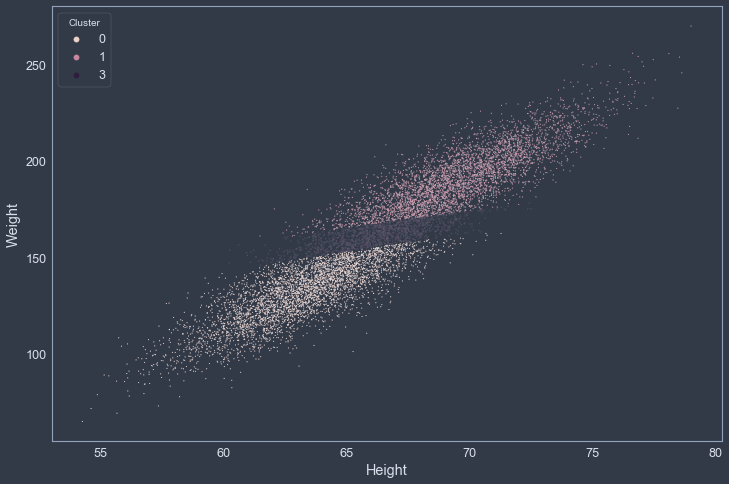

In [8]:
# Produce a category of cluster from male/feamle and unsure
gen_cat = []
for i in clusters_em: 
    if i[1] > 0.75: gen_cat.append(1)
    elif i[1] < 0.25: gen_cat.append(0)
    else: gen_cat.append(3)
em_pred_df = pd.DataFrame(data=X, columns=['Height', 'Weight'])
em_pred_df['Cluster'] = gen_cat

# Plot
plt.figure(figsize=[12,8])
sns.scatterplot(data=em_pred_df, x="Height", y="Weight", hue="Cluster", s=1)

## Hierarchical Clustering
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together. This is can then be represented as a dendrogram.

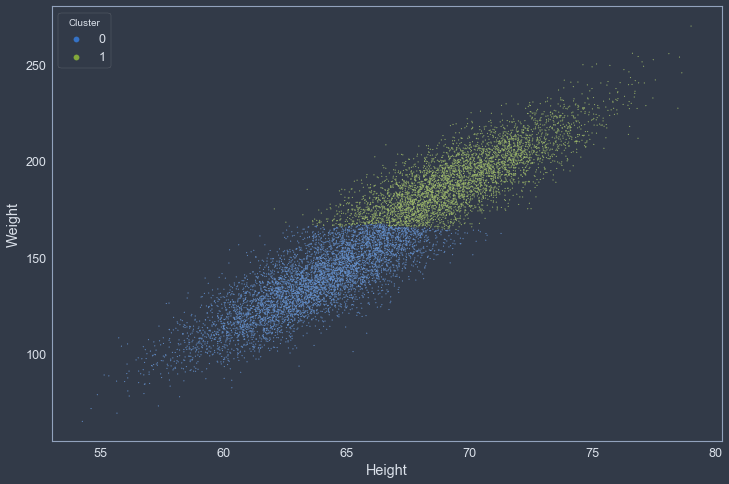

In [9]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

hc_pred_df = pd.DataFrame(data=X, columns=['Height', 'Weight'])
hc_pred_df['Cluster'] = y_hc

# Plot
plt.figure(figsize=[12,8])
sns.scatterplot(data=hc_pred_df, x="Height", y="Weight", hue="Cluster", s=1)

Dendogram, not very useful for this dataset but it does indicate some large subtree clustres.

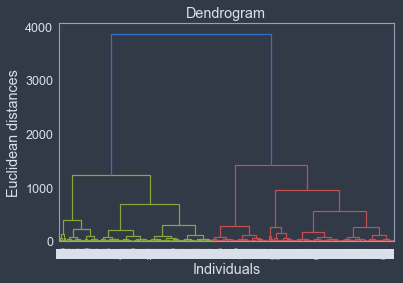

In [10]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Individuals')
plt.ylabel('Euclidean distances')
plt.show()